In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import pylab as py
import matplotlib.pyplot as plt
import sklearn.model_selection as mods
import sklearn.linear_model as sklin
import sklearn.tree as st
#import xgboost as xgb


In [2]:
df=pd.read_csv('c:/temp/TestPredictionResults/TestPredictionResults_23-03-19_06-08-06.csv')

In [3]:
df.head()

,TestProgram_Name_NA,Family,IsConcurrent,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_SubmitterFullName_NA,ITuff_Lot_NA,ituff_EndDate_NA,ITuff_PartType_FromSpark,ITuff_BomGroup_FromSpark,ITuff_ProcessStep_FromSpark,ITuff_ExperimentType_FromSpark,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
0,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,357.691731
1,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,363.206417
2,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,363.616004
3,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,357.596088
4,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,367.486744


In [4]:
# graph of how many tests failed

In [5]:
print(len(df[df['ITuff_PerUnit_IsPassed_Target_NA'] == False]))
df = df.drop(df[df['ITuff_PerUnit_IsPassed_Target_NA'] == False].index)


13300


In [6]:
max_time = 750

In [7]:
# add graph of how many above max_time

In [8]:
print(len(df[df['ITuff_PerUnit_testTimeInMS_Target'] > max_time]))
df = df.drop(df[df['ITuff_PerUnit_testTimeInMS_Target'] > max_time].index)

737


In [9]:
#sb.pairplot(df.head(5)) # after dummies

In [10]:
#sb.displot(df['Shmoo_tests_count'])

In [11]:
df.corr()

,IsConcurrent,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
IsConcurrent,1.000000,-0.064463,0.379109,NaN,0.999860,0.562814,-0.015892,NaN,0.383653
Patterns_Count,-0.064463,1.000000,0.753612,NaN,-0.064355,0.273334,-0.070628,NaN,0.367980
Tests_Count,0.379109,0.753612,1.000000,NaN,0.379147,0.743554,-0.049261,NaN,0.542823
Mtt_Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConcurrentFlows_Count,0.999860,-0.064355,0.379147,NaN,1.000000,0.562344,-0.016219,NaN,0.382911
Shmoo_tests_count,0.562814,0.273334,0.743554,NaN,0.562344,1.000000,0.026209,NaN,0.534367
ITuff_Temperature_NA,-0.015892,-0.070628,-0.049261,NaN,-0.016219,0.026209,1.000000,NaN,0.284905
ITuff_PerUnit_IsPassed_Target_NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITuff_PerUnit_testTimeInMS_Target,0.383653,0.367980,0.542823,NaN,0.382911,0.534367,0.284905,NaN,1.000000


In [12]:
df.describe()

,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_PerUnit_testTimeInMS_Target
count,72814.000000,72814.000000,72814.0,72814.000000,72814.000000,72814.000000,72814.000000
mean,16313.452207,12363.771198,0.0,1.479097,256.336487,62.631705,266.710494
std,6220.608749,4198.039389,0.0,1.499443,155.988290,48.733422,130.178849
min,245.000000,458.000000,0.0,0.000000,0.000000,-5.000000,4.626091
25%,16001.000000,13065.000000,0.0,0.000000,216.000000,0.000000,192.820204
50%,17422.000000,13437.000000,0.0,0.000000,239.000000,95.000000,236.629752
75%,20305.000000,14801.000000,0.0,3.000000,313.000000,100.000000,356.872579
max,57800.000000,19752.000000,0.0,3.000000,589.000000,100.000000,749.855810


In [13]:
df.groupby('IsConcurrent').count()

,TestProgram_Name_NA,Family,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_SubmitterFullName_NA,ITuff_Lot_NA,ituff_EndDate_NA,ITuff_PartType_FromSpark,ITuff_BomGroup_FromSpark,ITuff_ProcessStep_FromSpark,ITuff_ExperimentType_FromSpark,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
IsConcurrent,,,,,,,,,,,,,,,,,
False,36899,36899,36899,36899,36899,36899,36899,36899,36899,36899,36899,36899,36899,36899,36899,36899,36899
True,35915,35915,35915,35915,35915,35915,35915,35915,35915,35915,35915,35915,35915,35915,35915,35915,35915


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72814 entries, 0 to 86850
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TestProgram_Name_NA                72814 non-null  object 
 1   Family                             72814 non-null  object 
 2   IsConcurrent                       72814 non-null  bool   
 3   Patterns_Count                     72814 non-null  int64  
 4   Tests_Count                        72814 non-null  int64  
 5   Mtt_Count                          72814 non-null  int64  
 6   ConcurrentFlows_Count              72814 non-null  int64  
 7   Shmoo_tests_count                  72814 non-null  int64  
 8   ITuff_Temperature_NA               72814 non-null  int64  
 9   ITuff_SubmitterFullName_NA         72814 non-null  object 
 10  ITuff_Lot_NA                       72814 non-null  object 
 11  ituff_EndDate_NA                   72814 non-null  obj

In [15]:
df.drop(['TestProgram_Name_NA','ITuff_Temperature_NA','ITuff_SubmitterFullName_NA','ITuff_Lot_NA', 'ituff_EndDate_NA','ITuff_PerUnit_IsPassed_Target_NA'], axis=1, inplace=True)
#df.drop(['ConcurrentFlows_Count'], axis=1, inplace=True)                # ConcurrentFlows_Count doesn't change result
#df.drop(['IsConcurrent'], axis=1, inplace=True)                         # 'IsConcurrent' doesn’t change result
df.drop(['Family'], axis=1, inplace=True)                               # 'Family' doesn’t change result
#df.drop(['Patterns_Count'], axis=1, inplace=True)                       # Patterns_Count helps a little
#df.drop(['Tests_Count'], axis=1, inplace=True)                         # Tests_Count helps a little
#df.drop(['Shmoo_tests_count'], axis=1, inplace=True)                   # Shmoo_tests_count helps a little
df.drop(['ITuff_BomGroup_FromSpark'], axis=1, inplace=True)
#df.drop(['ITuff_ProcessStep_FromSpark'], axis=1, inplace=True)         # ITuff_ProcessStep_FromSpark is critical
#df.drop(['ITuff_ExperimentType_FromSpark'], axis=1, inplace=True)      # ITuff_ExperimentType_FromSpark helps a little

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72814 entries, 0 to 86850
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsConcurrent                       72814 non-null  bool   
 1   Patterns_Count                     72814 non-null  int64  
 2   Tests_Count                        72814 non-null  int64  
 3   Mtt_Count                          72814 non-null  int64  
 4   ConcurrentFlows_Count              72814 non-null  int64  
 5   Shmoo_tests_count                  72814 non-null  int64  
 6   ITuff_PartType_FromSpark           72814 non-null  object 
 7   ITuff_ProcessStep_FromSpark        72814 non-null  object 
 8   ITuff_ExperimentType_FromSpark     72814 non-null  object 
 9   ITuff_PerUnit_testTimeInMS_Target  72814 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 5.6+ MB


In [17]:
#df = pd.get_dummies(df, columns =['Family'])
df = pd.get_dummies(df, columns =['ITuff_PartType_FromSpark'])
#df = pd.get_dummies(df, columns =['ITuff_BomGroup_FromSpark'])
df = pd.get_dummies(df, columns =['ITuff_ProcessStep_FromSpark'])
df = pd.get_dummies(df, columns =['ITuff_ExperimentType_FromSpark'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72814 entries, 0 to 86850
Data columns (total 77 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   IsConcurrent                                72814 non-null  bool   
 1   Patterns_Count                              72814 non-null  int64  
 2   Tests_Count                                 72814 non-null  int64  
 3   Mtt_Count                                   72814 non-null  int64  
 4   ConcurrentFlows_Count                       72814 non-null  int64  
 5   Shmoo_tests_count                           72814 non-null  int64  
 6   ITuff_PerUnit_testTimeInMS_Target           72814 non-null  float64
 7   ITuff_PartType_FromSpark_H64ADNSVAL         72814 non-null  uint8  
 8   ITuff_PartType_FromSpark_H64AHSFVCC         72814 non-null  uint8  
 9   ITuff_PartType_FromSpark_H64ALNAVBJ         72814 non-null  uint8  
 10  ITuff_Part

In [19]:
df.describe()

,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_PerUnit_testTimeInMS_Target,ITuff_PartType_FromSpark_H64ADNSVAL,ITuff_PartType_FromSpark_H64AHSFVCC,ITuff_PartType_FromSpark_H64ALNAVBJ,ITuff_PartType_FromSpark_H64ALNMVBJ,...,ITuff_PartType_FromSpark_P58EXSFVCC,ITuff_ProcessStep_FromSpark_CLASSCOLD,ITuff_ProcessStep_FromSpark_CLASSHOT,ITuff_ProcessStep_FromSpark_CSM,ITuff_ProcessStep_FromSpark_FUSE,ITuff_ProcessStep_FromSpark_PHMCOLD,ITuff_ProcessStep_FromSpark_PHMHOT,ITuff_ExperimentType_FromSpark_Correlation,ITuff_ExperimentType_FromSpark_Engineering,ITuff_ExperimentType_FromSpark_WalkTheLot
count,72814.000000,72814.000000,72814.0,72814.000000,72814.000000,72814.000000,72814.000000,72814.000000,72814.000000,72814.000000,...,72814.000000,72814.000000,72814.000000,72814.000000,72814.000000,72814.000000,72814.000000,72814.000000,72814.000000,72814.000000
mean,16313.452207,12363.771198,0.0,1.479097,256.336487,266.710494,0.000206,0.014530,0.048617,0.007897,...,0.000261,0.201555,0.493628,0.020985,0.004312,0.131541,0.147980,0.608276,0.390584,0.001140
std,6220.608749,4198.039389,0.0,1.499443,155.988290,130.178849,0.014351,0.119663,0.215068,0.088513,...,0.016152,0.401164,0.499963,0.143335,0.065527,0.337993,0.355082,0.488139,0.487885,0.033743
min,245.000000,458.000000,0.0,0.000000,0.000000,4.626091,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16001.000000,13065.000000,0.0,0.000000,216.000000,192.820204,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17422.000000,13437.000000,0.0,0.000000,239.000000,236.629752,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,20305.000000,14801.000000,0.0,3.000000,313.000000,356.872579,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,57800.000000,19752.000000,0.0,3.000000,589.000000,749.855810,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#df.Family_RaptorLake.value_counts()

In [21]:
#sb.pairplot(df,hue='ITuff_PerUnit_testTimeInMS_Target',)

In [22]:
#plt.hist(df['ITuff_PerUnit_testTimeInMS_Target'])
#plt.show()

In [23]:
#sb.displot(df['ITuff_PerUnit_testTimeInMS_Target']) 

In [24]:
x = df.drop(['ITuff_PerUnit_testTimeInMS_Target'],axis=1)
y = df.ITuff_PerUnit_testTimeInMS_Target

In [25]:
x_train, x_test, y_train, y_test = mods.train_test_split(x, y, test_size=0.30,random_state=101)

In [26]:
model = sklin.LinearRegression()
#model = XGBRegressor(objective="reg:squarederror", random_state=42)


In [27]:
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_test)

In [29]:
y_check = y_pred / y_test

In [30]:
y_check

85099    0.710392
71614    0.973126
13062    1.037071
37372    1.045544
66800    1.063169
           ...   
5777     1.081877
983      0.929497
26733    0.925904
85610    1.022013
41662    1.328143
Name: ITuff_PerUnit_testTimeInMS_Target, Length: 21845, dtype: float64

In [31]:
# add percentage bar plot

In [32]:
import matplotlib.pyplot as plt

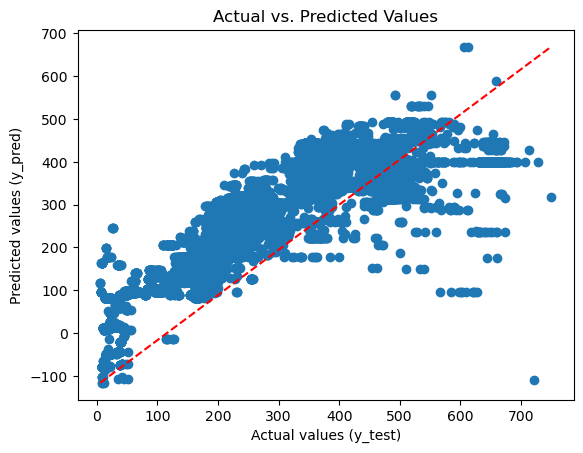

In [33]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], '--', color='red')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [35]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# print the results
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)
print("MAE: ", mae)

MSE:  4234.78063516791
RMSE:  65.07519216389538
R-squared:  0.7520305980829974
MAE:  45.07168573196402
